<table>
<thead>
  <tr>
    <td></td>
    <td>
        Kinga Węzka <br>
        kinga.wezka@pw.edu.pl <br>
        Warsaw University of Technology  <br>
Faculty Geodesy and Cartography <br>
<a ref="https://www.google.com/maps/place/Gmach+G%C5%82%C3%B3wny+Politechniki+Warszawskiej/@52.220656,21.0094422,19z/data=!3m1!4b1!4m5!3m4!1s0x471ecce951c85a19:0x712b0e1503c42b91!8m2!3d52.220656!4d21.0099894"> N 52&ordm; 12' 45&quot; / E 21&ordm; 03' 51&quot;</a>
    </td>
    <td>
<a rel="license" href="https://www.pw.edu.pl"><img alt="Politechnika Warszawska" style="border-width:0" src="https://www.pw.edu.pl/design/pw/images/znak-pw.png" width="50%" /></a>
    </td>
  </tr>
</thead>
</table>

<div class="alert alert-block alert-success">
<b> Temat: </b> 
    Znajdowanie współrzędnych punktów płaskich wewnątrz figury geometrycznej (prostokąt)
</div>

**Zadanie na kolokwium z Informatyki GIK PW sem. 4 (2021/2022) - punktacja:**

 | Zadanie | Zad. 01 | Zad. 02 | Zad. 03 | Zad. 04 | Suma|
 |---------|:-------:|:-------:|:-------:|:-------:|----:|
 | Punkty  |    2    |    4    |   4     |   4     |  14 |

### Dla  danych współrzędnych punktów płaskich x i y, wykonaj następujące działania:
+ **Zad.01** Połącz listy danych punktów x,y w tablicę (ndarray) o nazwie **dane**, zawierającą tyle wierszy ile  jest punktów w listach x,y oraz 3 kolumny, gdzie:
    + kolumna 1 to numer punktu (1,2,3,...200) - wygeneruj samodzielnie tę numeracje
    + kolumna 2 zawiera współrzędne x
    + kolumna 3 zawiera współrzedne y
 
 
+ **Zad.02** Znajdź dwa punkty, o skrajnych wartościach współrzędnej x (minimalna i maksymalna wartość x ze zbioru danych). Zbuduj taki prostokąt, którego lewy dolny wierzchołek znajduje się w punkcie o minimalnej wartości x, jego szerokość równa jest połowie różnicy współrzędnych x tych dwóch punktów, a wysokość to 5. (w Zad.04 narysuj ten prostokąt oraz przypisz mu etykietę label = 'prostokąt')


+ **Zad.03** Znajdź punkty, które znajdują się wewnątrz prostokąta. Wybierz te punkty i stwórz nową tablicę, gdzie w kolejnych kolumnach będą numer, x oraz y tych punktów. W osobnej tablicy zapisz pozostałe punkty. 
+ **Zad.03b** Stwórz trzecią tablicę, w której zapiszesz wszystkie punkty o numerach parzystych, ale niemniejszych od 50 i niewiększych od 150


+ **Zad.04** Przygotuj wykres zawierający:
    + **dane**
    + prostokąt
    + pokoloruj punkty wewnątrz i na zewnątrz prostokąta (na inny kolor)
    + przypisz etykiety kolejnym seriom danym (np. label = 'punkty wewnątrz okręgu') i wyświetl legendę
    
    Zadbaj o aspekty wizualne i czytelność swojego wykresu

In [22]:
import numpy as np
from numpy.linalg import inv
from math import pi, sin, cos, sqrt, exp
from pylab import randn
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.linestyle'] = '-'
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11
mpl.rcParams['axes.titlesize'] = 11
mpl.rcParams['axes.labelsize'] = 11
mpl.rcParams['axes.grid'] = True
mpl.rcParams['lines.markersize'] ** 2. # marker size in scatter

# Dane punkty x,y
n = 200
x = 4 * randn(n) + 15
y = 2 * randn(n) + 10

**Zad.01**

In [23]:
# Zad1. Złożenie tablicy
nr = np.arange(1, n+1)
data =  np.column_stack((nr.T, np.array(x).T, np.array(y).T)) 
print('wymiary tablicy (w, k):', np.shape(data))
print('tablica :\n', data)

wymiary tablicy (w, k): (200, 3)
tablica :
 [[  1.          22.47959892   9.86412809]
 [  2.          10.65920508  10.61813241]
 [  3.          13.70807638   8.1846111 ]
 [  4.          21.9302355    8.69796886]
 [  5.          10.88261262  10.72773751]
 [  6.          18.96213349  10.75093899]
 [  7.           9.25753434  11.47399586]
 [  8.          19.28377617   9.24495469]
 [  9.          18.06228995  10.88204614]
 [ 10.          22.05283002  13.09271068]
 [ 11.          16.64853158  10.47987456]
 [ 12.           8.29504273  14.48259838]
 [ 13.          13.78622604   9.62413533]
 [ 14.          15.46046771  10.10217882]
 [ 15.          20.93132797  10.75726608]
 [ 16.          13.87894503  11.92423842]
 [ 17.           8.28399239  10.12666395]
 [ 18.          11.65780038  11.87223483]
 [ 19.          14.56861054   8.96245305]
 [ 20.          12.43508958  11.2482071 ]
 [ 21.          20.67709421   7.30452761]
 [ 22.          13.47145392  10.51044065]
 [ 23.          14.32357973   7.

**Zad.02**

In [26]:
# Punkry o min i max wartości x
row_min = 0
row_max = 0
for rows in data:
    if rows[1] == data[:, 1].min():
        row_min = rows
    if rows[1] == data[:, 1].max():
        row_max = rows
print(f'Numer punktu o min. wartości y to {row_min[0]:.0f}, jego współ. x={row_min[1]:.4f} y={row_min[2]:.4f}') 
print(f'Numer punktu o max. wartości y to {row_max[0]:.0f}, jego współ. x={row_max[2]:.4f} y={row_max[2]:.4f}') 

#odległość pomiędzy punktami o min i max wartości x
szer = sqrt( (row_max[1]-row_min[1])**2 +  (row_max[2]-row_min[2])**2 )/2
wys = 5
xy1 = [row_min[1], row_min[2]] 
xy2 = [row_min[1], row_min[2]+wys] 
xy3 = [row_min[1]+szer, row_min[2]+wys] 
xy4 = [row_min[1]+szer, row_min[2]] 
pts_prostokat = np.array([xy1, xy2, xy3, xy4])
print('wierzchołki: xy1 (lewy dolny róg) - system:\n', pts_prostokat)


Numer punktu o min. wartości y to 80, jego współ. x=3.1018 y=8.0541
Numer punktu o max. wartości y to 36, jego współ. x=13.3093 y=13.3093
wierzchołki: xy1 (lewy dolny róg) - system:
 [[ 3.10177017  8.05407161]
 [ 3.10177017 13.05407161]
 [14.69597483 13.05407161]
 [14.69597483  8.05407161]]


Pkt 1 [3.10177017 8.05407161]
Pkt 2 [ 3.10177017 13.05407161]
Pkt 3 [14.69597483 13.05407161]
Pkt 4 [14.69597483  8.05407161]


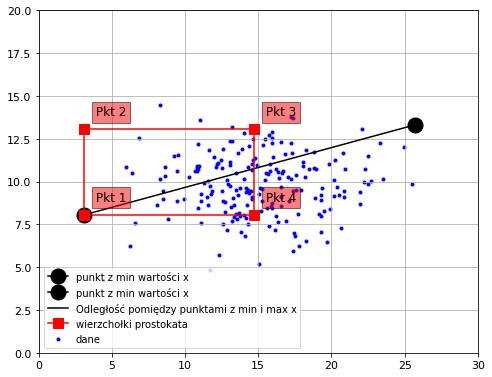

In [27]:
# Pomocniczo: narysowanie kwadratu z wyznaczonych współrzednych
xx = 20/2.54; yy = 16/2.54
fig, ax =  plt.subplots(nrows=1, ncols=1, figsize=(xx, yy))

ax.scatter(data[:,1], data[:,2], marker = '.', color = 'blue', label ='dane') 
ax.plot(row_min[1],row_min[2], marker = 'o', markersize =15, color = 'black', label ='punkt z min wartości x') 
ax.plot(row_max[1],row_max[2], marker = 'o', markersize =15, color = 'black', label ='punkt z min wartości x') 
ax.plot([row_min[1],row_max[1]],[row_min[2],row_max[2]], markersize =15, color = 'black', label ='Odległość pomiędzy punktami z min i max x') 

pts_prostokat1 = np.array([xy1, xy2, xy3, xy4, xy1])
ax.plot(pts_prostokat1[:,0],  pts_prostokat1[:,1], marker ='s',  markersize =10, color ='red', label = "wierzchołki prostokata")

# opis wierzchołków
n = 1
for p in pts_prostokat:
    name = f'Pkt {n}'
    print(name,  p)
    plt.text(p[0] + 0.8, p[1] + 0.8,  name, fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
    n+=1

ax.set_xlim(0, 30)
ax.set_ylim(0, 20)
ax.legend(loc='lower left')
plt.show()

**Zad.03**

In [29]:
# Zad3 - sposób A
# Klasyczna pętla z warunkiem
rows_inside = [] #pusta lista do zbierania wierszy wewnatrz obszaru kwadratu
rows_outside =[] #pusta lista do zbierania wierszy poza obszarem kwadratu
for rows in data:
    if (rows[1] >= pts_prostokat[0,0] and rows[1] <= pts_prostokat[3,0]  and 
        rows[2] >= pts_prostokat[0,1] and rows[2] <= pts_prostokat[1,1] ):
        rows_inside.append(rows)
    else:
        rows_outside.append(rows)
        
# konwersja list której elementami sa wiersze tablicy do tablicy numpy
inside = np.array(rows_inside)
outside = np.array(rows_outside)

**Zad.04**

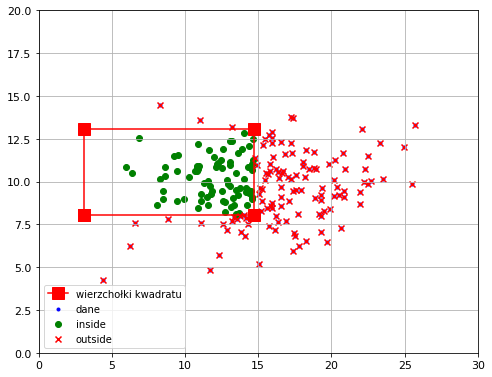

In [30]:
# Zad 4 - Rysunek 
xx = 20/2.54; yy = 16/2.54
fig, ax =  plt.subplots(nrows=1, ncols=1, figsize=(xx, yy))

ax.scatter(data[:,1], data[:,2], marker = '.', color = 'blue', label ='dane') 
ax.scatter(inside[:,1], inside[:,2], marker = 'o', color = 'green', label ='inside') 
ax.scatter(outside[:,1], outside[:,2], marker = 'x', color = 'red', label ='outside') 

pts_prostokat0 = np.array([xy1, xy2, xy3, xy4, xy1]) # dodanie pierwszego punktu na końcu tablicy aby domknać kwadrat na rysunku
ax.plot(pts_prostokat0[:,0],  pts_prostokat0[:,1], marker ='s',  markersize =12, color ='red', label = "wierzchołki kwadratu") 

ax.set_xlim(0, 30)
ax.set_ylim(0, 20)
ax.legend(loc='lower left')
plt.show()